<a href="https://colab.research.google.com/github/qu8411826/ML100-Days/blob/master/Homework/Day71________HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [0]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [0]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [53]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [0]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [55]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [0]:
model = Sequential()

In [0]:
#卷積層1

In [0]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [0]:
model.add(Dropout(rate=0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#卷積層2與池化層2

In [0]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [0]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(10, activation='softmax'))

In [70]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [71]:
try:
    model.load_weights("Day71_cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [76]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary_crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [77]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 49s 1ms/step - loss: 1.8138 - acc: 0.3427 - val_loss: 1.6132 - val_acc: 0.4576
Epoch 2/10
40000/40000 [==============================] - 45s 1ms/step - loss: 1.4487 - acc: 0.4793 - val_loss: 1.3864 - val_acc: 0.5387
Epoch 3/10
40000/40000 [==============================] - 46s 1ms/step - loss: 1.2941 - acc: 0.5383 - val_loss: 1.3008 - val_acc: 0.5827
Epoch 4/10
40000/40000 [==============================] - 45s 1ms/step - loss: 1.1857 - acc: 0.5806 - val_loss: 1.2080 - val_acc: 0.6152
Epoch 5/10
40000/40000 [==============================] - 45s 1ms/step - loss: 1.1002 - acc: 0.6102 - val_loss: 1.1464 - val_acc: 0.6344
Epoch 6/10
40000/40000 [==============================] - 46s 1ms/step - loss: 1.0306 - acc: 0.6375 - val_loss: 1.1037 - val_acc: 0.6342
Epoch 7/10
40000/40000 [==============================] - 46s 1ms/step - loss: 0

In [0]:
model.save_weights("Day71_cifarCnnModel_HW.h5")

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

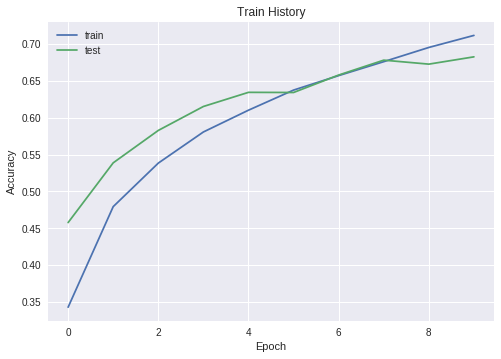

In [80]:
show_train_history('acc','val_acc')

Train on 40000 samples, validate on 10000 samples
Epoch 1/4
40000/40000 [==============================] - 23s 580us/step - loss: 0.0337 - acc: 0.7602 - val_loss: 0.0413 - val_acc: 0.7116
Epoch 2/4
40000/40000 [==============================] - 22s 562us/step - loss: 0.0335 - acc: 0.7619 - val_loss: 0.0414 - val_acc: 0.7102
Epoch 3/4
40000/40000 [==============================] - 23s 563us/step - loss: 0.0333 - acc: 0.7604 - val_loss: 0.0412 - val_acc: 0.7096
Epoch 4/4
40000/40000 [==============================] - 22s 561us/step - loss: 0.0330 - acc: 0.7630 - val_loss: 0.0409 - val_acc: 0.7147


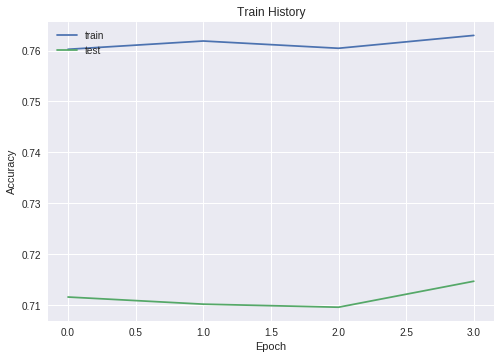

In [86]:
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=4, batch_size=16, verbose=1) 
show_train_history('acc','val_acc')

Train on 40000 samples, validate on 10000 samples
Epoch 1/4
40000/40000 [==============================] - 24s 607us/step - loss: 0.1131 - acc: 0.9559 - val_loss: 0.1403 - val_acc: 0.9460
Epoch 2/4
40000/40000 [==============================] - 24s 588us/step - loss: 0.1122 - acc: 0.9558 - val_loss: 0.1389 - val_acc: 0.9466
Epoch 3/4
40000/40000 [==============================] - 24s 589us/step - loss: 0.1107 - acc: 0.9566 - val_loss: 0.1394 - val_acc: 0.9464
Epoch 4/4
40000/40000 [==============================] - 24s 593us/step - loss: 0.1087 - acc: 0.9575 - val_loss: 0.1380 - val_acc: 0.9468


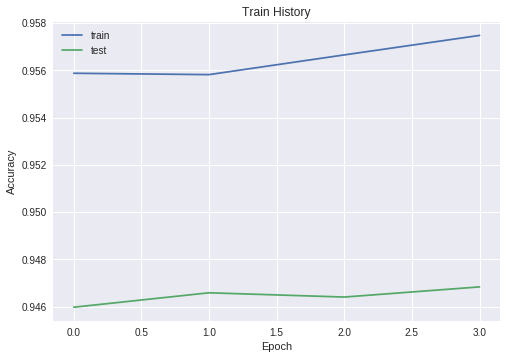

In [87]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=4, batch_size=16, verbose=1)  
show_train_history('acc','val_acc')